In [19]:
import numpy as np
import matplotlib.pyplot as plt

from typing import *

import time

from src.camera import CameraIDS
from src.color_corrector import ColorCorrector
from src.auto_feature_manager import AutoFeatureManager

from src.timer import Timer
Timer.enabled = True

In [20]:
camera = CameraIDS()
camera.set_roi_max()

0
0
2592
1944


True

In [21]:
auto_feature_manager = AutoFeatureManager(camera)
auto_feature_manager.auto_white_balance = 'on'
auto_feature_manager.auto_exposure = 'on'
auto_feature_manager.auto_gain= 'on'


In [22]:
color_corrector = ColorCorrector()

In [23]:
camera.start_acquisition()
camera.start_capturing()

<class 'numpy.ndarray'>
Timings:
Post Processing                0.01377s
  Auto Features                0.00482s
  Color Correction             0.00889s
<class 'numpy.ndarray'>
Timings:
Post Processing                0.00490s
  Auto Features                0.00007s
  Color Correction             0.00481s
<class 'numpy.ndarray'>
Timings:
Post Processing                0.00489s
  Auto Features                0.00007s
  Color Correction             0.00480s
<class 'numpy.ndarray'>
Timings:
Post Processing                0.00973s
  Auto Features                0.00460s
  Color Correction             0.00507s
<class 'numpy.ndarray'>
Timings:
Post Processing                0.00596s
  Auto Features                0.00009s
  Color Correction             0.00582s


Text(0.5, 1.0, 'Corrected Image')

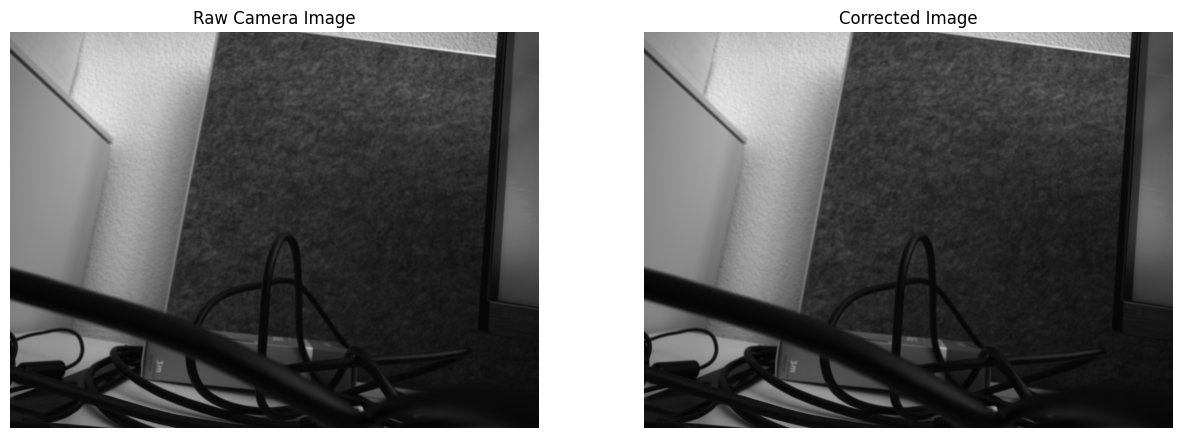

In [24]:
for i in range(5):
    img = camera.capture()
    img_before = np.copy(img.get_numpy_3D())
    print(type(img_before))
    with Timer("Post Processing"):
        with Timer("Auto Features"):
            auto_feature_manager(img)
        with Timer("Color Correction"):
            color_corrector(img)
    img_after = img.get_numpy_3D()
    time.sleep(0.01)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 2, 1)
ax.axis('off')
ax.imshow(img_before)
ax.set_title("Raw Camera Image")
ax = fig.add_subplot(1, 2, 2)
ax.axis('off')
ax.imshow(img_after)
ax.set_title("Corrected Image")

In [25]:
camera.stop_capturing()
camera.stop_acquisition()

BadAccessException: Error-Code: 4 (PEAK_RETURN_CODE_BAD_ACCESS) | Error-Description: [Function: DSRevokeBuffer | Error-Code: -1005 (GC_ERR_ACCESS_DENIED) | Error-Text: Buffer is queued!

In [18]:
camera.close()

Close error: Error-Code: 4 (PEAK_RETURN_CODE_BAD_ACCESS) | Error-Description: [Function: DSStopAcquisition | Error-Code: -1004 (GC_ERR_RESOURCE_IN_USE) | Error-Text: Access denied: Stream is started!
